In [4]:
# Uber Trip Analysis Project - Starter Notebook

# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import xgboost as xgb

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# 🧭 Step 1: Load Dataset
file_path = '../data/Uber-Jan-Feb-FOIL.csv'  # adjust path as needed
try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("CSV file not found. Please check the path.")

# 🧼 Step 2: Basic Exploration
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- First 5 Rows ---")
print(df.head())

# Add other CSVs like: apr14, may14... etc.
# df_apr = pd.read_csv('../data/uber-raw-data-apr14.csv')

# 📊 Step 3: Preprocessing (To be expanded)
# Example for time conversion
# df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Add new columns: Hour, Day, Weekday, Month
# df['Hour'] = df['Date/Time'].dt.hour

# 🔍 Step 4: EDA (To be added)
# Use seaborn/matplotlib to plot hourly trips, weekday trends, base comparison

# 🧠 Step 5: Feature Engineering
# Add lag features for time series modeling (if needed)

# 🤖 Step 6: Model Building (To be added later)
# Try Random Forest, XGBoost, GBRT

# 📈 Step 7: Evaluation
# Use MSE, R2, MAPE

# 📦 Step 8: Save Outputs
# Export predictions, plots, or models if needed

# 📝 Step 9: Document Findings
# Add markdown cells or comments to explain insights


Data loaded successfully.

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB
None

--- First 5 Rows ---
  dispatching_base_number      date  active_vehicles  trips
0                  B02512  1/1/2015              190   1132
1                  B02765  1/1/2015              225   1765
2                  B02764  1/1/2015             3427  29421
3                  B02682  1/1/2015              945   7679
4                  B02617  1/1/2015             1228   9537


In [2]:
!pip install xgboost


^C


   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/149.9 MB 165.2 kB/s eta 0:15:08
   ---------------------------------------- 0.0/149.9 MB 281.8 kB/s eta 0:08:52
   ---------------------------------------- 0.1/149.9 MB 598.8 kB/s eta 0:04:11
   ---------------------------------------- 0.2/149.9 MB 986.4 kB/s eta 0:02:32
   ---------------------------------------- 0.3/149.9 MB 1.2 MB/s eta 0:02:10
   ---------------------------------------- 0.4/149.9 MB 1.4 MB/s eta 0:01:49
   ---------------------------------------- 0.6/149.9 MB 1.6 MB/s eta 0:01:34
   ---------------------------------------- 0.7/149.9 MB 1.8 MB/s eta 0:01:25
   ---------------------------------------- 0.9/149.9 MB 1.9 MB/s eta 0:01:19
   ---------------------------------------- 1.0/149.9 MB 2.0 MB/s eta 0:01:14


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Uber Trip Analysis Project - Starter Notebook

# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import xgboost as xgb

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# 🧭 Step 1: Load Dataset
file_path = '../data/Uber-Jan-Feb-FOIL.csv'  # adjust path as needed
try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("CSV file not found. Please check the path.")

# 🧼 Step 2: Basic Exploration
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- First 5 Rows ---")
print(df.head())

# 📊 Step 3: Preprocessing
if 'Pickup_date' in df.columns:
    df['Pickup_date'] = pd.to_datetime(df['Pickup_date'])
    df['Hour'] = df['Pickup_date'].dt.hour
    df['DayOfWeek'] = df['Pickup_date'].dt.dayofweek
    df['Date'] = df['Pickup_date'].dt.date
else:
    print("No 'Pickup_date' column found in the dataset.")

# 🔍 Step 4: Exploratory Data Analysis (EDA)
sns.set(style="whitegrid")

# 1. Trips per Hour
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df)
plt.title('Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

# 2. Trips per Day of the Week
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=df)
plt.title('Trips per Day of the Week')
plt.xlabel('Day of the Week (0=Monday)')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

# 3. Trips per Base (if column exists)
if 'Dispatching_base_num' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y='Dispatching_base_num', data=df, order=df['Dispatching_base_num'].value_counts().index)
    plt.title('Trips per Dispatching Base')
    plt.xlabel('Number of Trips')
    plt.ylabel('Dispatching Base')
    plt.tight_layout()
    plt.show()
else:
    print("No 'Dispatching_base_num' column found for base-level analysis.")

# 4. Heatmap of Pickup Locations (if Lat/Lon available)
if 'Lat' in df.columns and 'Lon' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(x=df['Lon'], y=df['Lat'], cmap="Reds", fill=True, thresh=0.05)
    plt.title('Heatmap of Uber Pickups')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.show()
else:
    print("No 'Lat' and 'Lon' columns found for location heatmap.")

# 🧠 Step 5: Feature Engineering
# Add lag features for time series modeling (if needed)

# 🤖 Step 6: Model Building (To be added later)
# Try Random Forest, XGBoost, GBRT

# 📈 Step 7: Evaluation
# Use MSE, R2, MAPE

# 📦 Step 8: Save Outputs
# Export predictions, plots, or models if needed

# 📝 Step 9: Document Findings
# Add markdown cells or comments to explain insights


Data loaded successfully.

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB
None

--- First 5 Rows ---
  dispatching_base_number      date  active_vehicles  trips
0                  B02512  1/1/2015              190   1132
1                  B02765  1/1/2015              225   1765
2                  B02764  1/1/2015             3427  29421
3                  B02682  1/1/2015              945   7679
4                  B02617  1/1/2015             1228   9537
No 'Pickup_date' column found in the dataset.


ValueError: Could not interpret value `Hour` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [6]:
# === Import libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# === Load dataset ===
df = pd.read_csv('../data/Uber-Jan-Feb-FOIL.csv')  # adjust path as needed
print("Dataset loaded. Shape:", df.shape)

# === Convert Pickup_date to datetime ===
if 'Pickup_date' in df.columns:
    df['Pickup_date'] = pd.to_datetime(df['Pickup_date'], errors='coerce')
    df['Hour'] = df['Pickup_date'].dt.hour
    df['DayOfWeek'] = df['Pickup_date'].dt.dayofweek  # 0 = Monday
    df['Date'] = df['Pickup_date'].dt.date
    print("Datetime features created.")
else:
    print("No 'Pickup_date' column found.")

# === Check for nulls ===
print("Missing values:\n", df.isnull().sum())

# === 1. Trips per Hour ===
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df)
plt.title('Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

# === 2. Trips per Day of Week ===
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=df)
plt.title('Trips per Day of Week')
plt.xlabel('Day of Week (0 = Mon, 6 = Sun)')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

# === 3. Trips by Dispatching Base ===
if 'Dispatching_base_num' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Dispatching_base_num', data=df, order=df['Dispatching_base_num'].value_counts().index)
    plt.title('Trips by Dispatching Base')
    plt.xlabel('Base')
    plt.ylabel('Number of Trips')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Dispatching_base_num' not found in the dataset.")

# === 4. Heatmap of Pickup Locations (if coordinates available) ===
if 'Lat' in df.columns and 'Lon' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(x=df['Lon'], y=df['Lat'], cmap='Reds', fill=True, thresh=0.05)
    plt.title('Heatmap of Pickup Locations')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.show()
else:
    print("Latitude/Longitude not available for this dataset.")


Dataset loaded. Shape: (354, 4)
No 'Pickup_date' column found.
Missing values:
 dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64


ValueError: Could not interpret value `Hour` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

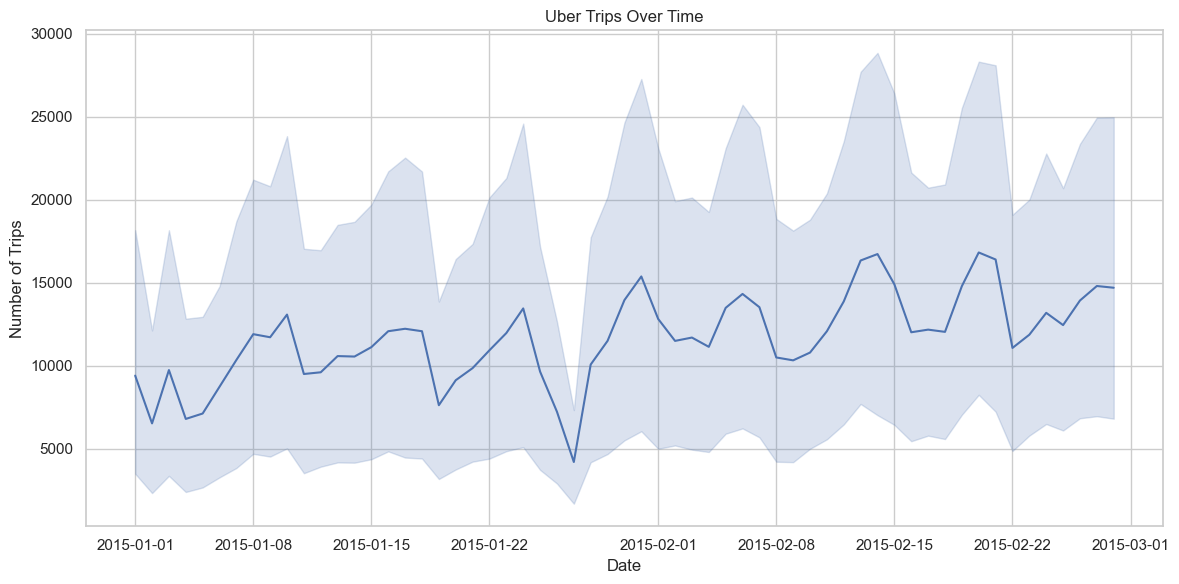

<module 'matplotlib.pyplot' from 'c:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

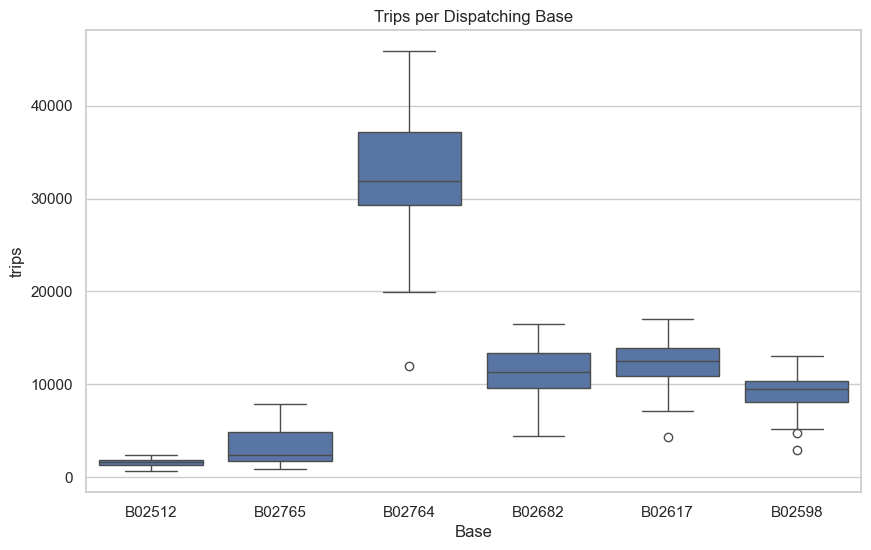

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../data/Uber-Jan-Feb-FOIL.csv')

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Add new time features
df['DayOfWeek'] = df['date'].dt.dayofweek  # 0 = Monday
df['WeekdayName'] = df['date'].dt.day_name()

# 1. Line plot: Trips over time
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='trips')
plt.title('Uber Trips Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

# 2. Trips per Dispatching Base
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='dispatching_base_number', y='trips')
plt.title('Trips per Dispatching Base')
plt.xlabel('Base')
plt


Columns: Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')


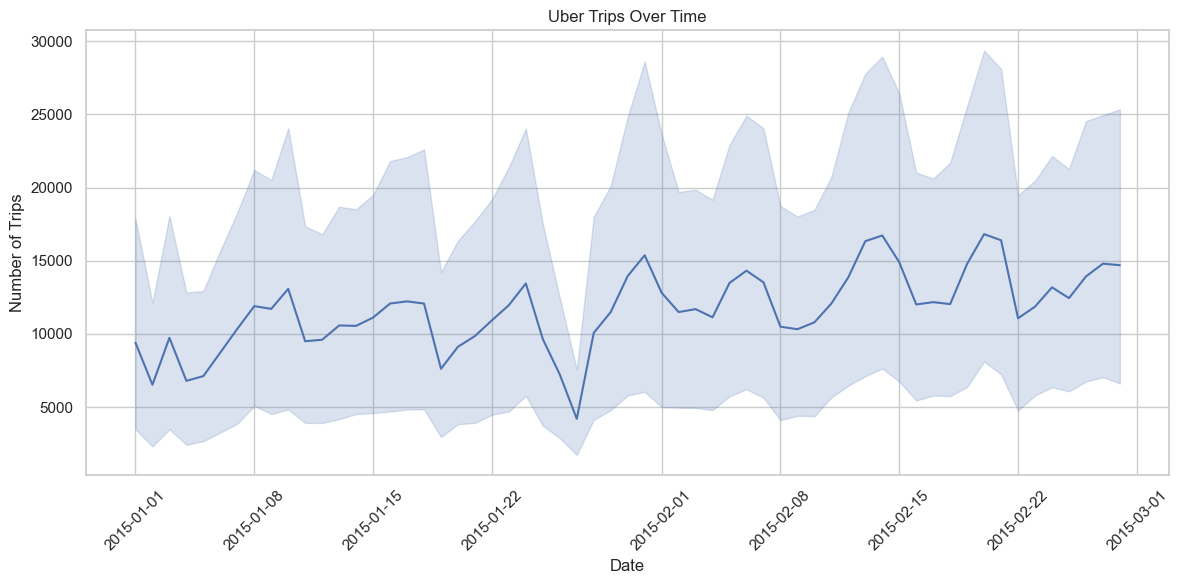

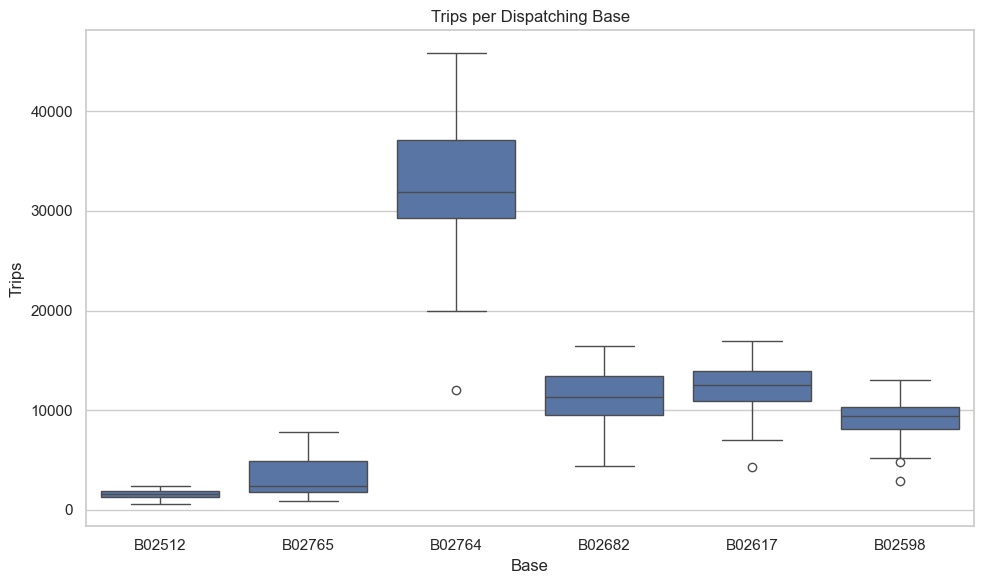

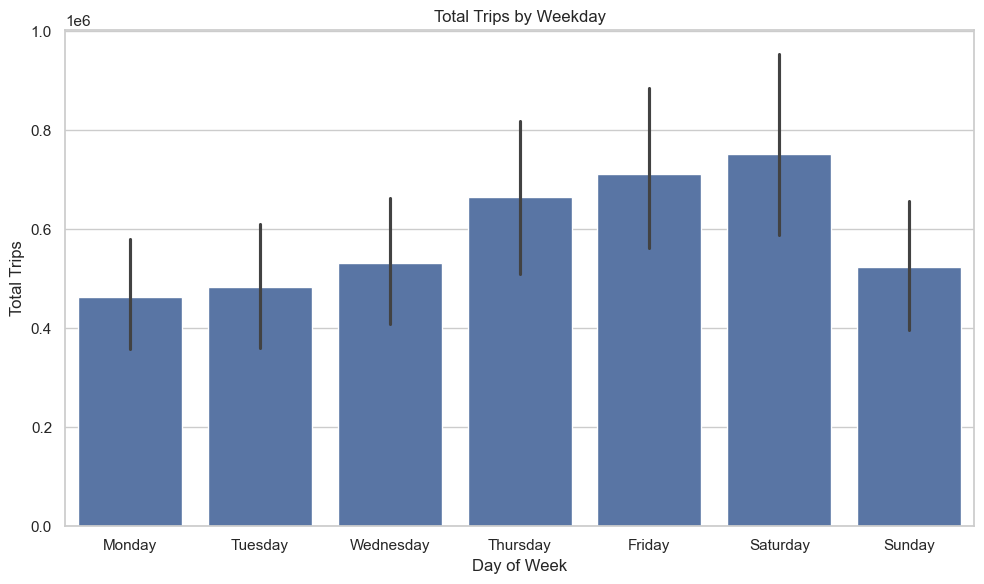

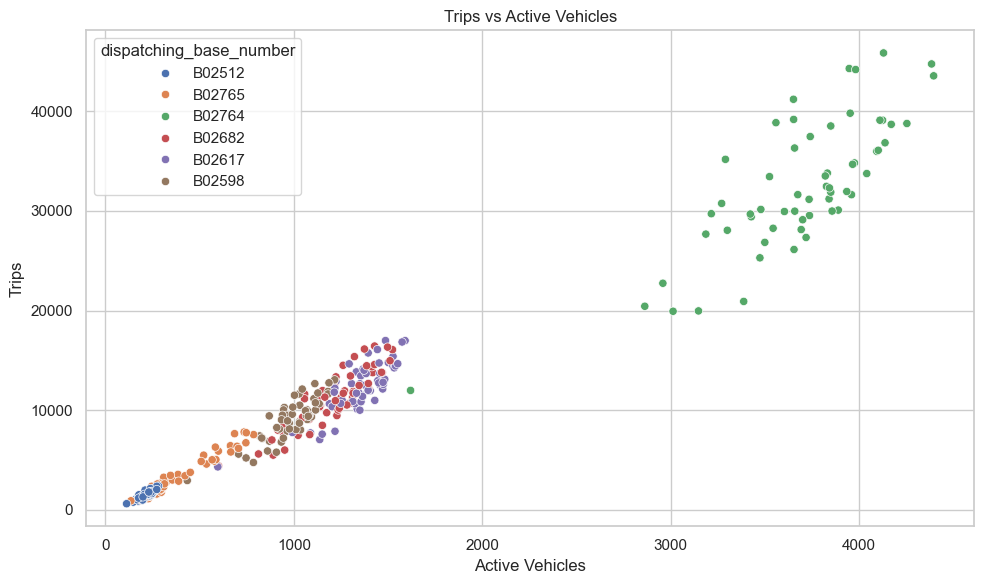

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('../data/Uber-Jan-Feb-FOIL.csv')

# Check column names
print("Columns:", df.columns)

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Add day-of-week columns
df['DayOfWeek'] = df['date'].dt.dayofweek  # 0 = Monday
df['WeekdayName'] = df['date'].dt.day_name()

# ==== 1. Line Plot: Uber Trips Over Time ====
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='trips')
plt.title('Uber Trips Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ==== 2. Box Plot: Trips per Dispatching Base ====
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='dispatching_base_number', y='trips')
plt.title('Trips per Dispatching Base')
plt.xlabel('Base')
plt.ylabel('Trips')
plt.tight_layout()
plt.show()

# ==== 3. Bar Plot: Total Trips by Weekday ====
if 'WeekdayName' in df.columns:
    plt.figure(figsize=(10,6))
    sns.barplot(data=df, x='WeekdayName', y='trips', estimator='sum',
                order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    plt.title('Total Trips by Weekday')
    plt.xlabel('Day of Week')
    plt.ylabel('Total Trips')
    plt.tight_layout()
    plt.show()
else:
    print("❌ 'WeekdayName' column missing. Cannot plot total trips by weekday.")

# ==== 4. Scatter Plot: Active Vehicles vs. Trips ====
if 'active_vehicles' in df.columns:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x='active_vehicles', y='trips', hue='dispatching_base_number')
    plt.title('Trips vs Active Vehicles')
    plt.xlabel('Active Vehicles')
    plt.ylabel('Trips')
    plt.tight_layout()
    plt.show()
else:
    print("❌ 'active_vehicles' column missing. Cannot plot trips vs active vehicles.")


R² Score: 0.9851195739612558
MSE: 1788807.8209663548


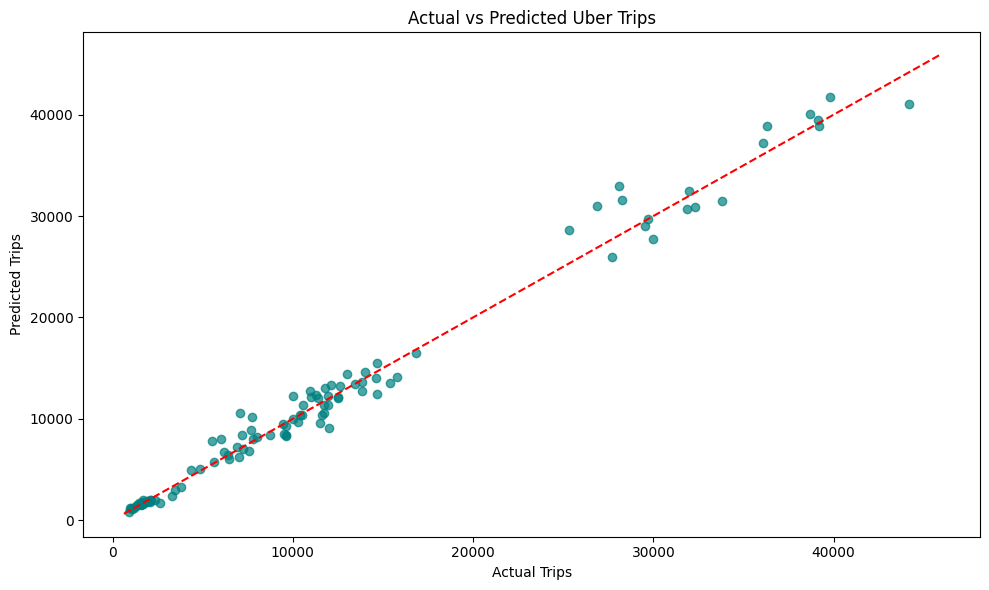

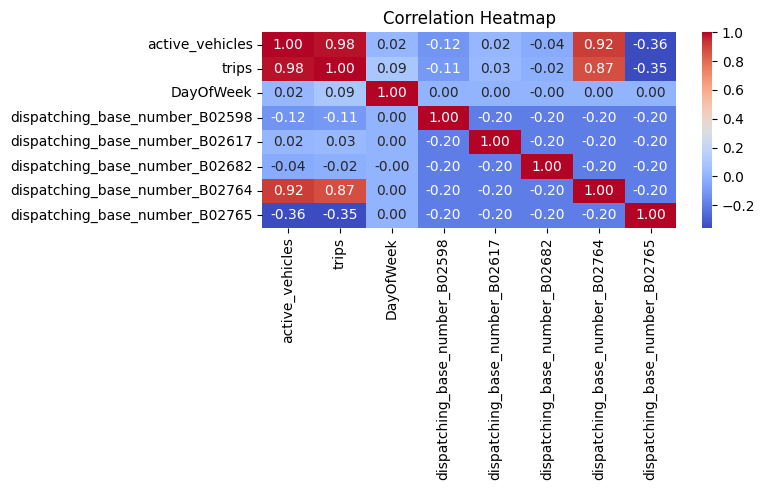

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load data
df = pd.read_csv('../data/Uber-Jan-Feb-FOIL.csv')

# Preprocess
df['date'] = pd.to_datetime(df['date'])
df['DayOfWeek'] = df['date'].dt.dayofweek
df['WeekdayName'] = df['date'].dt.day_name()

# Create dummy variables for base
df = pd.get_dummies(df, columns=['dispatching_base_number'], drop_first=True)

# Define features and target
X = df.drop(columns=['date', 'trips', 'WeekdayName'])  # features
y = df['trips']  # target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# === 📈 Plot: Actual vs Predicted ===
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.title('Actual vs Predicted Uber Trips')
plt.xlabel('Actual Trips')
plt.ylabel('Predicted Trips')
plt.tight_layout()
plt.show()

# === 🔥 Optional EDA: Correlation Heatmap ===
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


R² Scores:
Random Forest     : 0.9851
Gradient Boosting : 0.985
XGBoost           : 0.9731


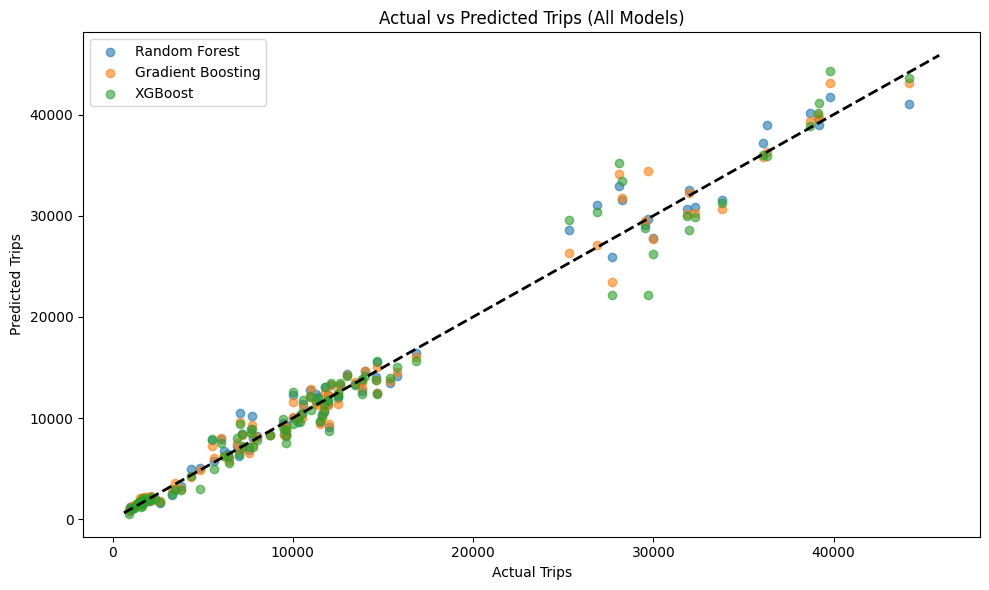

In [2]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Use preprocessed df (assuming you already have it)
# If not, load and preprocess:
df = pd.read_csv('../data/Uber-Jan-Feb-FOIL.csv')
df['date'] = pd.to_datetime(df['date'])
df['DayOfWeek'] = df['date'].dt.dayofweek
df['WeekdayName'] = df['date'].dt.day_name()
df = pd.get_dummies(df, columns=['dispatching_base_number'], drop_first=True)

# Define X and y
X = df.drop(columns=['date', 'trips', 'WeekdayName'])
y = df['trips']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# === 1. Random Forest ===
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)

# === 2. Gradient Boosting ===
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
gbr_pred = gbr_model.predict(X_test)
gbr_r2 = r2_score(y_test, gbr_pred)

# === 3. XGBoost ===
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_pred)

# === Print R² scores ===
print("R² Scores:")
print("Random Forest     :", round(rf_r2, 4))
print("Gradient Boosting :", round(gbr_r2, 4))
print("XGBoost           :", round(xgb_r2, 4))

# === Plot Actual vs Predicted for all ===
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, alpha=0.6, label='Random Forest')
plt.scatter(y_test, gbr_pred, alpha=0.6, label='Gradient Boosting')
plt.scatter(y_test, xgb_pred, alpha=0.6, label='XGBoost')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Trips (All Models)')
plt.xlabel('Actual Trips')
plt.ylabel('Predicted Trips')
plt.legend()
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 36 candidates, totalling 108 fits
✅ Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
🎯 Tuned XGBoost R² Score: 0.9837


<module 'matplotlib.pyplot' from 'c:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

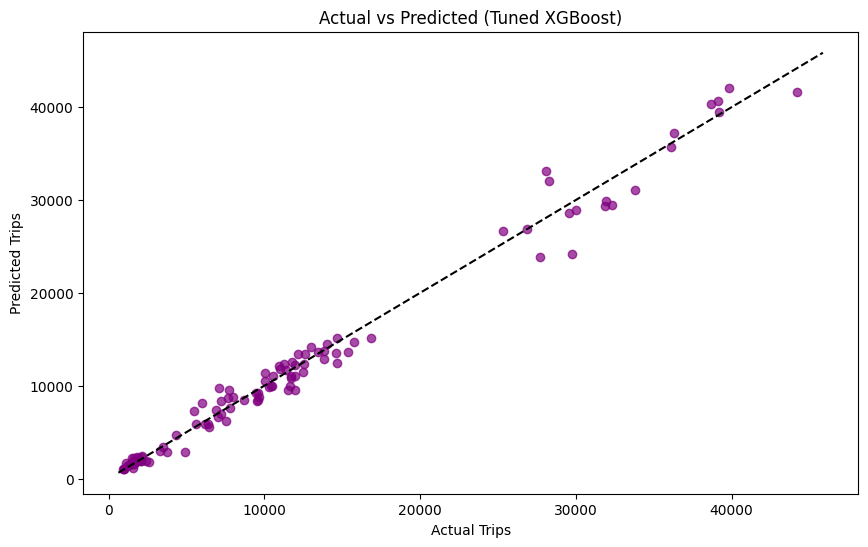

In [3]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Prepare the data again (in case it's a fresh cell)
df = pd.read_csv('../data/Uber-Jan-Feb-FOIL.csv')
df['date'] = pd.to_datetime(df['date'])
df['DayOfWeek'] = df['date'].dt.dayofweek
df['WeekdayName'] = df['date'].dt.day_name()
df = pd.get_dummies(df, columns=['dispatching_base_number'], drop_first=True)

X = df.drop(columns=['date', 'trips', 'WeekdayName'])
y = df['trips']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define model and param grid
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 1.0]
}

# Grid search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_xgb = grid_search.best_estimator_

# Predict and evaluate
xgb_pred_tuned = best_xgb.predict(X_test)
xgb_r2_tuned = r2_score(y_test, xgb_pred_tuned)

print("✅ Best Parameters:", grid_search.best_params_)
print("🎯 Tuned XGBoost R² Score:", round(xgb_r2_tuned, 4))

# Plot Actual vs Predicted (tuned model)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_pred_tuned, alpha=0.7, color='purple', label='XGBoost (Tuned)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel('Actual Trips')
plt.ylabel('Predicted Trips')
plt.title('Actual vs Predicted (Tuned XGBoost)')
plt


In [4]:
import joblib

# Save the best tuned model
joblib.dump(best_xgb, '../models/best_xgboost_model.pkl')
print("✅ Model saved as: ../models/best_xgboost_model.pkl")


✅ Model saved as: ../models/best_xgboost_model.pkl


In [5]:
# Create DataFrame for export
results_df = pd.DataFrame({
    'Actual_Trips': y_test.values,
    'Predicted_Trips': xgb_pred_tuned
})

# Save to Excel
results_df.to_excel('../outputs/xgboost_predictions.xlsx', index=False)
print("✅ Predictions saved to: ../outputs/xgboost_predictions.xlsx")


ModuleNotFoundError: No module named 'openpyxl'

In [6]:
!pip install openpyxl


   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   ------ -------------------------------- 41.0/250.9 kB 245.8 kB/s eta 0:00:01
   ----------------- -------------------- 112.6/250.9 kB 598.8 kB/s eta 0:00:01
   ---------------------------------------  245.8/250.9 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- 250.9/250.9 kB 962.7 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
results_df.to_excel('../outputs/xgboost_predictions.xlsx', index=False)
print("✅ Predictions saved to: ../outputs/xgboost_predictions.xlsx")


✅ Predictions saved to: ../outputs/xgboost_predictions.xlsx


In [15]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

# ✅ Load raw trip data
df = pd.read_csv('../data/uber-raw-data-apr14.csv')

print(df.head())

# ✅ Convert Date/Time column
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# ✅ Set index
df.set_index('Date/Time', inplace=True)

# ✅ Resample hourly
hourly_trips = df['Base'].resample('H').count().reset_index()
hourly_trips.columns = ['Date', 'Trips']

# ✅ Plot hourly counts
plt.figure(figsize=(15,5))
plt.plot(hourly_trips['Date'], hourly_trips['Trips'])
plt.title('Hourly Uber Trips (April 2014)')
plt.xlabel('Date')
plt.ylabel('Trips')
plt.tight_layout()
plt.show()

# ✅ Decompose seasonality
result = seasonal_decompose(hourly_trips.set_index('Date')['Trips'], model='additive', period=24)
result.plot()
plt.tight_layout()
plt.show()

# ✅ Create lagged features
def create_lagged_features(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 24
X_all, y_all = create_lagged_features(hourly_trips['Trips'].values, window_size)

# ✅ Train/test split
split_idx = int(len(X_all)*0.8)
X_train, y_train = X_all[:split_idx], y_all[:split_idx]
X_test, y_test = X_all[split_idx:], y_all[split_idx:]

# ✅ TimeSeriesSplit for CV
tscv = TimeSeriesSplit(n_splits=3)

# ✅ Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mape = mean_absolute_percentage_error(y_test, rf_pred)

# ✅ Train Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
gbr_mape = mean_absolute_percentage_error(y_test, gbr_pred)

# ✅ Train XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_mape = mean_absolute_percentage_error(y_test, xgb_pred)

# ✅ Print MAPE
print(f"Random Forest MAPE: {rf_mape:.2%}")
print(f"Gradient Boosting MAPE: {gbr_mape:.2%}")
print(f"XGBoost MAPE: {xgb_mape:.2%}")

# ✅ Plot predictions
dates_test = hourly_trips['Date'][window_size+split_idx:]
plt.figure(figsize=(15,5))
plt.plot(dates_test, y_test, label='Actual', color='black')
plt.plot(dates_test, rf_pred, label='Random Forest')
plt.plot(dates_test, gbr_pred, label='Gradient Boosting')
plt.plot(dates_test, xgb_pred, label='XGBoost')
plt.legend()
plt.title('Actual vs Predicted Trips (Hourly)')
plt.xlabel('Date')
plt.ylabel('Trips')
plt.tight_layout()
plt.show()

# ✅ Ensemble predictions
weights = np.array([1/rf_mape, 1/gbr_mape, 1/xgb_mape])
weights /= weights.sum()
ensemble_pred = (
    weights[0]*rf_pred + 
    weights[1]*gbr_pred + 
    weights[2]*xgb_pred
)

ensemble_mape = mean_absolute_percentage_error(y_test, ensemble_pred)
print(f"Ensemble MAPE: {ensemble_mape:.2%}")

# ✅ Plot Ensemble
plt.figure(figsize=(15,5))
plt.plot(dates_test, y_test, label='Actual', color='black')
plt.plot(dates_test, ensemble_pred, label='Ensemble', color='purple')
plt.legend()
plt.title('Ensemble Model Prediction')
plt.xlabel('Date')
plt.ylabel('Trips')
plt.tight_layout()
plt.show()


  dispatching_base_number      date  active_vehicles  trips
0                  B02512  1/1/2015              190   1132
1                  B02765  1/1/2015              225   1765
2                  B02764  1/1/2015             3427  29421
3                  B02682  1/1/2015              945   7679
4                  B02617  1/1/2015             1228   9537


KeyError: 'Date/Time'

In [16]:
print(df.columns)


Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')


In [17]:
import pandas as pd

df = pd.read_csv("../data/uber-raw-data-apr14.csv")
print(df.columns)
print(df.head())


Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')
          Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512


In [18]:
import pandas as pd

df = pd.read_csv("../data/uber-raw-data-apr14.csv")
print(df.columns)
print(df.head())


Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')
          Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512


In [19]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

# ✅ Load the dataset
df = pd.read_csv("../data/uber-raw-data-apr14.csv")

# ✅ Clean column names (remove extra spaces if any)
df.columns = df.columns.str.strip()

# ✅ Convert to datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# ✅ Set datetime as index
df.set_index('Date/Time', inplace=True)

# ✅ Check basic info
print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())


Shape: (564516, 3)
Columns: Index(['Lat', 'Lon', 'Base'], dtype='object')
                         Lat      Lon    Base
Date/Time                                    
2014-04-01 00:11:00  40.7690 -73.9549  B02512
2014-04-01 00:17:00  40.7267 -74.0345  B02512
2014-04-01 00:21:00  40.7316 -73.9873  B02512
2014-04-01 00:28:00  40.7588 -73.9776  B02512
2014-04-01 00:33:00  40.7594 -73.9722  B02512


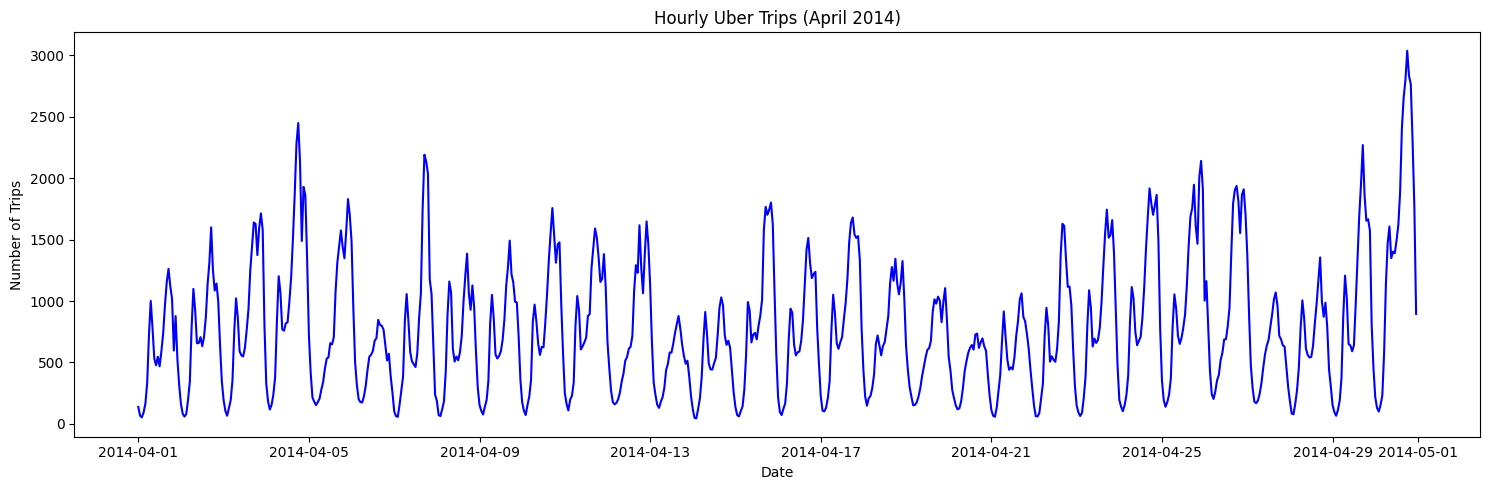

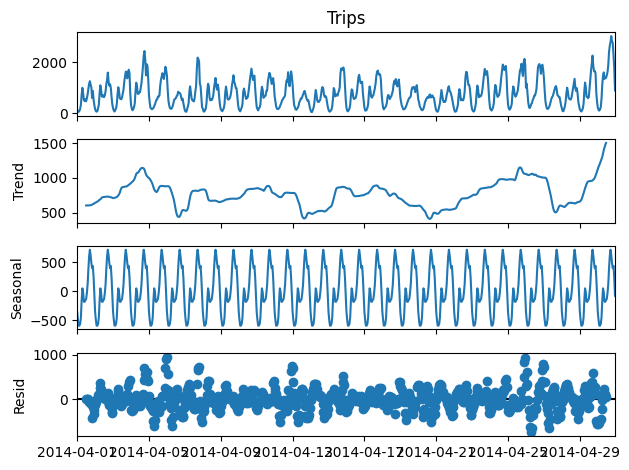

In [20]:
# ✅ Count trips per hour
hourly_trips = df['Base'].resample('H').count().reset_index()
hourly_trips.columns = ['Date', 'Trips']

# ✅ Plot hourly trip trends
plt.figure(figsize=(15,5))
plt.plot(hourly_trips['Date'], hourly_trips['Trips'], color='blue')
plt.title('Hourly Uber Trips (April 2014)')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

# ✅ Decompose seasonality and trend
result = seasonal_decompose(hourly_trips.set_index('Date')['Trips'], model='additive', period=24)
result.plot()
plt.tight_layout()
plt.show()


In [23]:
# ✅ Create lag features
def create_lagged_features(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Set window size = 24 hours (1 day)
window_size = 24
X_all, y_all = create_lagged_features(hourly_trips['Trips'].values, window_size)

# ✅ Train/Test split (80/20)
split_idx = int(len(X_all) * 0.8)
X_train, y_train = X_all[:split_idx], y_all[:split_idx]
X_test, y_test = X_all[split_idx:], y_all[split_idx:]

# ✅ TimeSeriesSplit (optional but useful)
tscv = TimeSeriesSplit(n_splits=3)


In [24]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (556, 24)
y_train shape: (556,)
X_test shape: (140, 24)
y_test shape: (140,)


Random Forest: MAPE=0.15, R²=0.89
Gradient Boosting: MAPE=0.17, R²=0.92
XGBoost: MAPE=0.15, R²=0.88


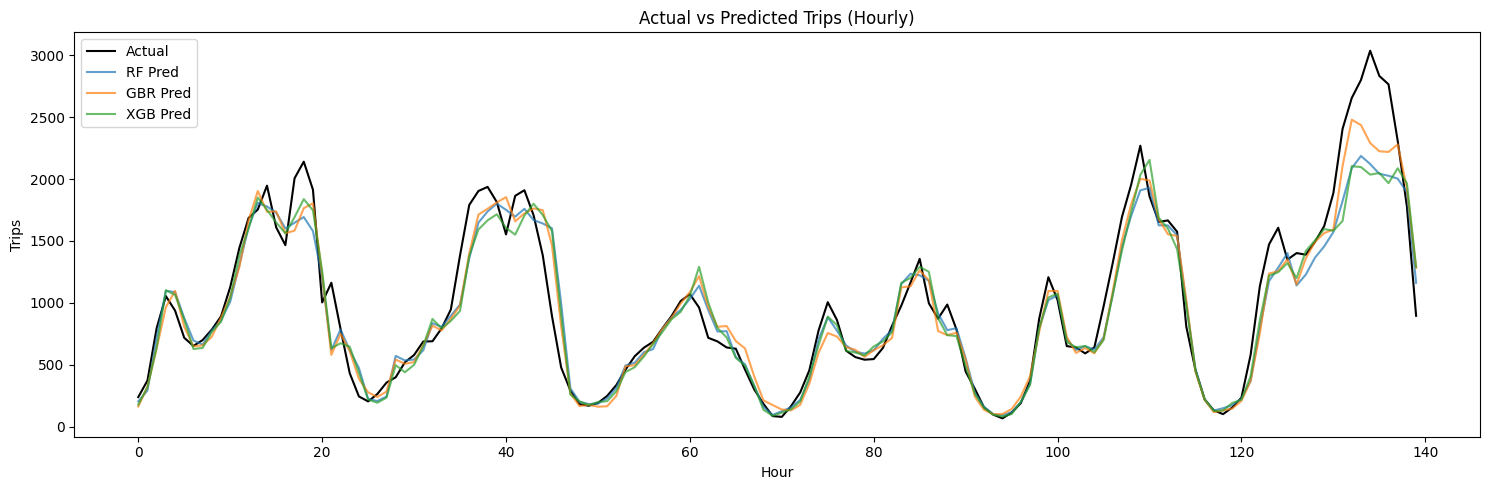

In [25]:
# ✅ 1. Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# ✅ 2. Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

# ✅ 3. XGBoost
xgbr = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgbr.fit(X_train, y_train)
xgb_pred = xgbr.predict(X_test)

# ✅ Evaluation
def evaluate(y_true, y_pred, model_name):
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}: MAPE={mape:.2f}, R²={r2:.2f}")

evaluate(y_test, rf_pred, "Random Forest")
evaluate(y_test, gbr_pred, "Gradient Boosting")
evaluate(y_test, xgb_pred, "XGBoost")

# ✅ Plot Actual vs Predicted
plt.figure(figsize=(15,5))
plt.plot(y_test, label='Actual', color='black')
plt.plot(rf_pred, label='RF Pred', alpha=0.7)
plt.plot(gbr_pred, label='GBR Pred', alpha=0.7)
plt.plot(xgb_pred, label='XGB Pred', alpha=0.7)
plt.title("Actual vs Predicted Trips (Hourly)")
plt.xlabel("Hour")
plt.ylabel("Trips")
plt.legend()
plt.tight_layout()
plt.show()


In [26]:
import os
# ✅ Create output folder if not exists
os.makedirs("../outputs", exist_ok=True)

# ✅ Save predictions
results_df = pd.DataFrame({
    'Actual_Trips': y_test,
    'RF_Predicted': rf_pred,
    'GBR_Predicted': gbr_pred,
    'XGB_Predicted': xgb_pred
})

results_df.to_excel("../outputs/uber_trip_predictions.xlsx", index=False)
print("✅ Predictions saved to: ../outputs/uber_trip_predictions.xlsx")


✅ Predictions saved to: ../outputs/uber_trip_predictions.xlsx


In [1]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, xgb_pred_tuned)
rmse = np.sqrt(mean_squared_error(y_test, xgb_pred_tuned))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


NameError: name 'y_test' is not defined

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import xgboost as xgb

# Load your dataset again
df = pd.read_csv("Uber-Jan-Feb-FOIL (1).csv")

  # replace with your actual dataset

# Preprocessing (select the same features and target as before)
X = df[['active_vehicles']]  # or your full feature set
y = df['trips']  # target column (change based on your dataset)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load or retrain XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Predictions
xgb_pred_tuned = model.predict(X_test)


FileNotFoundError: [Errno 2] No such file or directory: 'Uber-Jan-Feb-FOIL (1).csv'

In [13]:
print(df.columns)


Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb

# Load dataset
df = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\Uber_Trip_Analysis_Project\data\Uber-Jan-Feb-FOIL.csv")

# Check columns
print("Columns:", df.columns)

# If 'active_vehicles' and 'trips' columns exist, select them for modeling
if 'active_vehicles' in df.columns and 'trips' in df.columns:
    X = df[['active_vehicles']]  # Feature
    y = df['trips']             # Target
else:
    raise ValueError("Expected columns 'active_vehicles' and 'trips' not found in the dataset.")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"✅ MAE: {mae:.2f}")
print(f"✅ RMSE: {rmse:.2f}")


Columns: Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')
✅ MAE: 1281.14
✅ RMSE: 1929.84


In [14]:
df = pd.read_csv('../data/uber-raw-data-apr14.csv')
print(df.head())
print(df.columns)


  dispatching_base_number      date  active_vehicles  trips
0                  B02512  1/1/2015              190   1132
1                  B02765  1/1/2015              225   1765
2                  B02764  1/1/2015             3427  29421
3                  B02682  1/1/2015              945   7679
4                  B02617  1/1/2015             1228   9537
Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')


In [9]:
!pip install statsmodels


   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB 640.0 kB/s eta 0:00:16
   ---------------------------------------- 0.1/9.6 MB 1.2 MB/s eta 0:00:09
    --------------------------------------- 0.2/9.6 MB 1.6 MB/s eta 0:00:06
   - -------------------------------------- 0.4/9.6 MB 2.0 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.6 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/9.6 MB 2.3 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/9.6 MB 2.5 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/9.6 MB 2.6 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/9.6 MB 2.8 MB/s eta 0:00:03
   ------ --------------------------------- 1.5/9.6 MB 2.9 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/9.6 MB 3.0 MB/s eta 0:00:03
   -------- ------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install xgboost


  Using cached xgboost-3.0.3-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/149.9 MB 59.5 kB/s eta 0:41:58
   ---------------------------------------- 0.0/149.9 MB 93.5 kB/s eta 0:26:43
   ---------------------------------------- 0.0/149.9 MB 93.5 kB/s eta 0:26:43
   ---------------------------------------- 0.1/149.9 MB 130.9 kB/s eta 0:19:06
   ---------------------------------------- 0.1/149.9 MB 148.8 kB/s eta 0:16:47
   ---------------------------------------- 0.1/149.9 MB 157.1 kB/s eta 0:15:54
   ------------------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
